In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf

In [2]:
#load and read dataset
df=pd.read_csv('data/jena_climate_2009_2016.csv')
df.head()

Date Time  p (mbar)  T (degC)  Tpot (K)  Tdew (degC)  rh (%)  \
0  01.01.2009 00:10:00    996.52     -8.02    265.40        -8.90    93.3   
1  01.01.2009 00:20:00    996.57     -8.41    265.01        -9.28    93.4   
2  01.01.2009 00:30:00    996.53     -8.51    264.91        -9.31    93.9   
3  01.01.2009 00:40:00    996.51     -8.31    265.12        -9.07    94.2   
4  01.01.2009 00:50:00    996.51     -8.27    265.15        -9.04    94.1   

   VPmax (mbar)  VPact (mbar)  VPdef (mbar)  sh (g/kg)  H2OC (mmol/mol)  \
0          3.33          3.11          0.22       1.94             3.12   
1          3.23          3.02          0.21       1.89             3.03   
2          3.21          3.01          0.20       1.88             3.02   
3          3.26          3.07          0.19       1.92             3.08   
4          3.27          3.08          0.19       1.92             3.09   

   rho (g/m**3)  wv (m/s)  max. wv (m/s)  wd (deg)  
0       1307.75      1.03           1.75     152.3  
1       1309.80      0.72           1.50     136.1  
2       1310.24      0.19           0.63     171.6  
3       1309.19      0.34           0.50     198.0  
4       1309.00      0.32           0.63     214.3

In [3]:
df=df[5::6]
df

Date Time  p (mbar)  T (degC)  Tpot (K)  Tdew (degC)  \
5       01.01.2009 01:00:00    996.50     -8.05    265.38        -8.78   
11      01.01.2009 02:00:00    996.62     -8.88    264.54        -9.77   
17      01.01.2009 03:00:00    996.84     -8.81    264.59        -9.66   
23      01.01.2009 04:00:00    996.99     -9.05    264.34       -10.02   
29      01.01.2009 05:00:00    997.46     -9.63    263.72       -10.65   
...                     ...       ...       ...       ...          ...   
420521  31.12.2016 19:10:00   1002.18     -0.98    272.01        -5.36   
420527  31.12.2016 20:10:00   1001.40     -1.40    271.66        -6.84   
420533  31.12.2016 21:10:00   1001.19     -2.75    270.32        -6.90   
420539  31.12.2016 22:10:00   1000.65     -2.89    270.22        -7.15   
420545  31.12.2016 23:10:00   1000.11     -3.93    269.23        -8.09   

        rh (%)  VPmax (mbar)  VPact (mbar)  VPdef (mbar)  sh (g/kg)  \
5        94.40          3.33          3.14          0.19       1.96   
11       93.20          3.12          2.90          0.21       1.81   
17       93.50          3.13          2.93          0.20       1.83   
23       92.60          3.07          2.85          0.23       1.78   
29       92.20          2.94          2.71          0.23       1.69   
...        ...           ...           ...           ...        ...   
420521   72.00          5.69          4.09          1.59       2.54   
420527   66.29          5.51          3.65          1.86       2.27   
420533   72.90          4.99          3.64          1.35       2.26   
420539   72.30          4.93          3.57          1.37       2.22   
420545   72.60          4.56          3.31          1.25       2.06   

        H2OC (mmol/mol)  rho (g/m**3)  wv (m/s)  max. wv (m/s)  wd (deg)  
5                  3.15       1307.86      0.21           0.63     192.7  
11                 2.91       1312.25      0.25           0.63     190.3  
17                 2.94       1312.18      0.18           0.63     167.2  
23                 2.85       1313.61      0.10           0.38     240.0  
29                 2.71       1317.19      0.40           0.88     157.0  
...                 ...           ...       ...            ...       ...  
420521             4.08       1280.70      0.87           1.36     190.6  
420527             3.65       1281.87      1.02           1.92     225.4  
420533             3.63       1288.02      0.71           1.56     158.7  
420539             3.57       1288.03      0.35           0.68     216.7  
420545             3.31       1292.41      0.56           1.00     202.6  

[70091 rows x 15 columns]

In [4]:
#converting into a foramtted date time
#display value that correspond to particular time
df.index=pd.to_datetime(df['Date Time'],format='%d.%m.%Y %H:%M:%S')
df[:26]

Date Time  p (mbar)  T (degC)  Tpot (K)  \
Date Time                                                                
2009-01-01 01:00:00  01.01.2009 01:00:00    996.50     -8.05    265.38   
2009-01-01 02:00:00  01.01.2009 02:00:00    996.62     -8.88    264.54   
2009-01-01 03:00:00  01.01.2009 03:00:00    996.84     -8.81    264.59   
2009-01-01 04:00:00  01.01.2009 04:00:00    996.99     -9.05    264.34   
2009-01-01 05:00:00  01.01.2009 05:00:00    997.46     -9.63    263.72   
2009-01-01 06:00:00  01.01.2009 06:00:00    997.71     -9.67    263.66   
2009-01-01 07:00:00  01.01.2009 07:00:00    998.33     -9.17    264.12   
2009-01-01 08:00:00  01.01.2009 08:00:00    999.17     -8.10    265.12   
2009-01-01 09:00:00  01.01.2009 09:00:00    999.69     -7.66    265.52   
2009-01-01 10:00:00  01.01.2009 10:00:00   1000.27     -7.04    266.10   
2009-01-01 11:00:00  01.01.2009 11:00:00   1000.87     -7.41    265.68   
2009-01-01 12:00:00  01.01.2009 12:00:00   1000.30     -6.87    266.27   
2009-01-01 13:00:00  01.01.2009 13:00:00   1000.03     -5.89    267.27   
2009-01-01 14:00:00  01.01.2009 14:00:00    999.81     -5.94    267.24   
2009-01-01 15:00:00  01.01.2009 15:00:00    999.88     -5.69    267.48   
2009-01-01 16:00:00  01.01.2009 16:00:00    999.94     -5.40    267.76   
2009-01-01 17:00:00  01.01.2009 17:00:00   1000.17     -5.37    267.78   
2009-01-01 18:00:00  01.01.2009 18:00:00   1000.16     -5.25    267.90   
2009-01-01 19:00:00  01.01.2009 19:00:00   1000.22     -5.11    268.03   
2009-01-01 20:00:00  01.01.2009 20:00:00   1000.22     -4.90    268.24   
2009-01-01 21:00:00  01.01.2009 21:00:00   1000.19     -4.80    268.35   
2009-01-01 22:00:00  01.01.2009 22:00:00   1000.00     -4.50    268.66   
2009-01-01 23:00:00  01.01.2009 23:00:00    999.77     -4.47    268.71   
2009-01-02 00:00:00  02.01.2009 00:00:00    999.59     -4.54    268.65   
2009-01-02 01:00:00  02.01.2009 01:00:00    999.34     -4.44    268.77   
2009-01-02 02:00:00  02.01.2009 02:00:00    998.93     -4.29    268.95   

                     Tdew (degC)  rh (%)  VPmax (mbar)  VPact (mbar)  \
Date Time                                                              
2009-01-01 01:00:00        -8.78    94.4          3.33          3.14   
2009-01-01 02:00:00        -9.77    93.2          3.12          2.90   
2009-01-01 03:00:00        -9.66    93.5          3.13          2.93   
2009-01-01 04:00:00       -10.02    92.6          3.07          2.85   
2009-01-01 05:00:00       -10.65    92.2          2.94          2.71   
2009-01-01 06:00:00       -10.62    92.7          2.93          2.71   
2009-01-01 07:00:00       -10.10    92.9          3.04          2.83   
2009-01-01 08:00:00        -9.05    92.8          3.31          3.07   
2009-01-01 09:00:00        -8.84    91.2          3.43          3.13   
2009-01-01 10:00:00        -8.17    91.6          3.60          3.30   
2009-01-01 11:00:00        -8.66    90.7          3.50          3.17   
2009-01-01 12:00:00        -8.28    89.6          3.64          3.27   
2009-01-01 13:00:00        -7.46    88.6          3.93          3.48   
2009-01-01 14:00:00        -7.43    89.1          3.92          3.49   
2009-01-01 15:00:00        -7.00    90.4          3.99          3.61   
2009-01-01 16:00:00        -6.86    89.4          4.08          3.65   
2009-01-01 17:00:00        -6.82    89.4          4.09          3.66   
2009-01-01 18:00:00        -6.75    89.1          4.13          3.68   
2009-01-01 19:00:00        -6.57    89.4          4.17          3.73   
2009-01-01 20:00:00        -6.38    89.3          4.24          3.79   
2009-01-01 21:00:00        -6.14    90.2          4.27          3.85   
2009-01-01 22:00:00        -5.82    90.4          4.37          3.95   
2009-01-01 23:00:00        -5.84    90.1          4.38          3.95   
2009-01-02 00:00:00        -5.46    93.2          4.36          4.06   
2009-01-02 01:00:00        -5.19    94.4          4.39          4.15   
2009-01-02 02:

<Axes: xlabel='Date Time'>

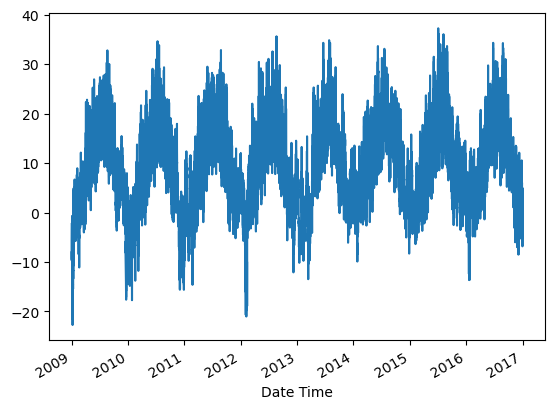

In [5]:
temp=df['T (degC)']
temp.plot()

In [6]:
#window size is the 5 measurements taken as the basis to make prediction of the next
def to_X_y(df,window_size=5):
    df_as_np=df.to_numpy()
    #input and output value that is to be added to the list
    X=[]
    y=[]
    #control out of bounds
    for i in range(len(df_as_np)-window_size):
        #adding 5 values in each row
        row=[[a] for a in df_as_np[i:i+5]]
        X.append(row)
        #label is the output based on the 5 preceding values
        label=df_as_np[i+5]
        y.append(label)
    return np.array(X),np.array(y)

In [7]:
window_size=5
X,y=to_X_y(temp,window_size)
X.shape, y.shape

((70086, 5, 1), (70086,))

In [8]:
X_train,y_train=X[:60000],y[:60000]
X_val,y_val=X[60000:65000],y[60000:65000]
X_test,y_test=X[65000:],y[65000:]
X_train.shape,y_train.shape,X_val.shape,y_val.shape,X_test.shape,y_test.shape

((60000, 5, 1), (60000,), (5000, 5, 1), (5000,), (5086, 5, 1), (5086,))

In [9]:
#libraries for the model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import *
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.losses import MeanSquaredError
from tensorflow.keras.metrics import RootMeanSquaredError
from tensorflow.keras.optimizers import Adam

In [10]:
#build the model
model=Sequential()
model.add(InputLayer((5,1)))
model.add(LSTM(64))
model.add(Dense(8,'relu'))
model.add(Dense(1,'linear'))

model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 64)                  │          16,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 8)                   │             520 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │               9 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 17,425 (68.07 KB)

 Trainable params: 17,425 (68.07 KB)

 Non-trainable params: 0 (0.00 B)

In [11]:
#making sure that model with least validation loss is selected
cp=ModelCheckpoint('model.keras',save_best_only=True)
model.compile(loss=MeanSquaredError(),optimizer=Adam(learning_rate=0.0001),metrics=[RootMeanSquaredError()])

In [12]:
model.fit(X_train,y_train,validation_data=(X_val,y_val),epochs=10,callbacks=[cp])

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 26s 11ms/step - loss: 123.0902 - root_mean_squared_error: 11.0140 - val_loss: 6.8097 - val_root_mean_squared_error: 2.6095
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 19s 10ms/step - loss: 18.4355 - root_mean_squared_error: 4.2740 - val_loss: 1.2409 - val_root_mean_squared_error: 1.1140
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 21s 10ms/step - loss: 4.3978 - root_mean_squared_error: 2.0891 - val_loss: 0.6422 - val_root_mean_squared_error: 0.8014
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 21s 11ms/step - loss: 1.4710 - root_mean_squared_error: 1.2122 - val_loss: 0.5202 - val_root_mean_squared_error: 0.7212
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 20s 10ms/step - loss: 0.9049 - root_mean_squared_error: 0.9510 - val_loss: 0.4992 - val_root_mean_squared_error: 0.7066
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 19s 10ms/step - loss: 0.7421 - root_mean_squared_error: 0.8614 - val_loss: 0.4959 - val_root_mean_squared_error: 0.7042
Epoch 7/10
1875/1875 ━━━

In [27]:
from tensorflow.keras.models import load_model
model=load_model('model.keras')